# 拒绝采样

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 期望分布

让$P(x)=3 e^{-\frac{x^2}{2}}+e^{-\frac{(x-4)^2}{2}}$是我们想要抽样的分布。注意，这是一个非标准化的分布有一个我们可以计算的标准化常数$Z$，但我们保持它的原样。            
$(Z \approx 10.0261955464)$

In [1]:
P = lambda x: 3 * np.exp(-x*x/2) + np.exp(-(x - 4)**2/2)
Z = 10.0261955464

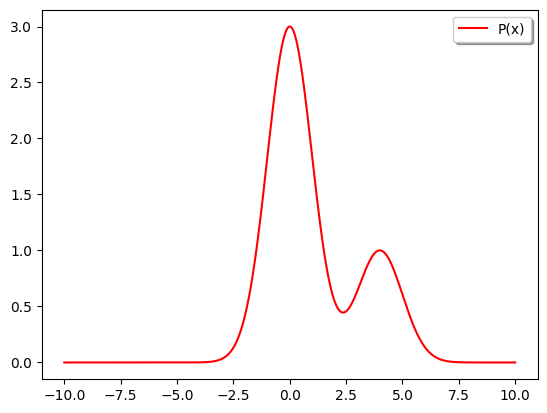

In [3]:
x_vals = np.linspace(-10, 10, 1000)
y_vals = P(x_vals)
plt.figure(1)
plt.plot(x_vals, y_vals, 'r', label='P(x)')
plt.legend(loc='upper right', shadow=True)
plt.show()

设我们要近似的函数是$f(x)=x$和$g(x)=sin(x)$。非规格化$P$的两个值如下:    
- $\mathbb{E}[x] \approx 10.02686647165$
- $\mathbb{E}[\sin (x)] \approx-1.15088010640$

In [4]:
f_x = lambda x: x
g_x = lambda x: np.sin(x)
true_expected_fx = 10.02686647165
true_expected_gx = -1.15088010640

## 拒绝采样
对于$c Q(x)>P(x) \forall x \in \mathbb{R}$, 拒绝抽样可以按如下方法进行。
- 采样$x_i \sim Q(x)$
- 采样$k_i \sim \operatorname{Uniform}\left[0, c Q\left(x_i\right)\right]$
- 接受$x_i \text { if } k_i<P\left(x_i\right)$

注意:可接受的$x_i$是自动从标准化的$p(x)$中采样的。                   
在下面的代码中$Q=\mathcal{N}\left(1,4^2\right)$

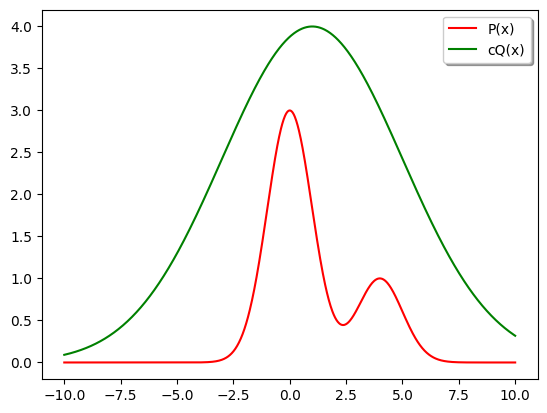

In [5]:
cQ = lambda x: 4 * np.exp(-(x-1)**2/(2.*16))
plt.figure(3)
plt.plot(x_vals, y_vals, 'r', label='P(x)')
plt.plot(x_vals, cQ(x_vals), 'g', label='cQ(x)')
plt.legend(loc='upper right', shadow=True)
plt.show()

In [7]:
expected_f_x = 0.
expected_g_x = 0.
n_samples = 100000
samples = []
for i in range(n_samples):
    sample = np.random.normal(1, 4) ## 正太
    P_x = P(sample)
    bent_coin = np.random.uniform(0, cQ(sample))
    if bent_coin < P_x:
        samples.append(sample)
expected_f_x = np.mean(f_x(samples))
expected_g_x = np.mean(g_x(samples))
expected_f_x *= Z
expected_g_x *= Z
print('E[f(x)] = %.5f, Error = %.5f' % (expected_f_x, abs(expected_f_x - true_expected_fx)))
print('E[g(x)] = %.5f, Error = %.5f' % (expected_g_x, abs(expected_g_x - true_expected_gx)))

E[f(x)] = 9.93744, Error = 0.08943
E[g(x)] = -1.16923, Error = 0.01835


计算拒绝抽样样本的直方图，并将其与归一化$P(x)$进行比较。很明显，拒绝抽样从底层归一化的$P(x)$中生成样本。

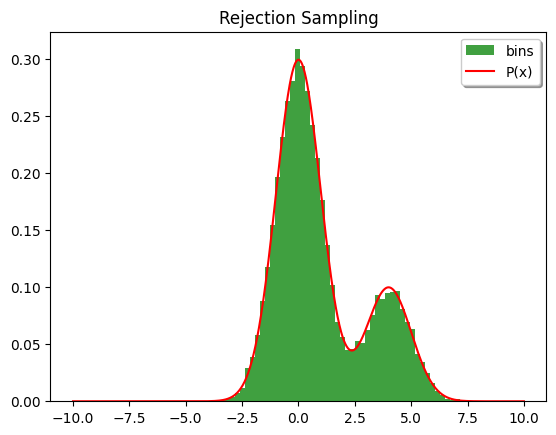

In [8]:
plt.hist(samples, bins=50, histtype='bar', facecolor='g', alpha=0.75, density=True, label='bins')
plt.plot(x_vals, y_vals/Z, 'r', label='P(x)')
plt.title('Rejection Sampling')
plt.legend(loc='upper right', shadow=True)
plt.show()